# ML Project Modeling
This file shows and describes the orginal data set modeling process.

In [1]:
import pandas as pd
import numpy as np
import os
import os.path as osp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir_path = os.getcwd()
data_path = osp.abspath(osp.join(dir_path,"Data/"))
df_path = osp.join(data_path,'preprocessed_data2.csv')
out_path = osp.join(data_path,'figure_data')
census_path = osp.join(data_path,'census_2010.csv')

## Census Data Frame

In [3]:
# reading Census Frame
census_df = pd.read_csv(census_path)

## MARTA Data
This data was created using our data set and the preprocess data file. Referrer to there for any indications of what columns are created from what data.

In [4]:
data_df = pd.read_csv(df_path)
data_df.UID = data_df.UID.str.replace("(",'')
data_df.UID = data_df.UID.str.replace(")",'')
data_df.UID = data_df.UID.str.split(',')
#data_df.UID = data_df.UID.apply(lambda x: [int(i) for i in x])
# extracting county
data_df.insert(len(data_df.columns),'COUNTY',data_df.UID.apply(lambda x: x[0]))
# extracting census tract
data_df.insert(len(data_df.columns),'TRACT',data_df.UID.apply(lambda x: x[1]))
# extracting Block
data_df.insert(len(data_df.columns),'BLOCK',data_df.UID.apply(lambda x: x[2]))
data_df.COUNTY = data_df.COUNTY.str.replace("'",'')
data_df.TRACT = data_df.TRACT.str.replace("'",'')
data_df.BLOCK = data_df.BLOCK.str.replace("'",'')
# changing datatypes
data_df.COUNTY = data_df.COUNTY.astype('int32')
data_df.TRACT = data_df.TRACT.astype('int32')
data_df.BLOCK = data_df.BLOCK.astype('int32')
data_df = data_df.drop(['UID'],axis=1)
data_df.head()

,stop_id,TRIPS,RAIL_STOP,COUNTY,TRACT,BLOCK
0,1,2,0,63,40202,1038
1,1,2,0,63,40202,1087
2,1,2,0,63,40202,2011
3,1,1,0,63,40203,2001
4,1,1,0,63,40204,1001


In [5]:
data_df[data_df.TRIPS == data_df.TRIPS.max()]
data_df.drop(index=60,inplace=True)

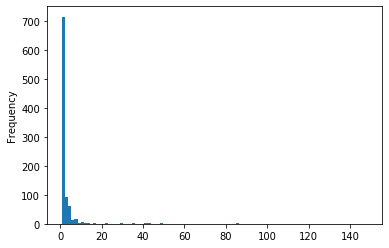

In [6]:
data_df.TRIPS.plot.hist(bins=100)

In [7]:
data_df.TRIPS.describe()

count    948.000000
mean       3.758439
std       10.801447
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max      148.000000
Name: TRIPS, dtype: float64

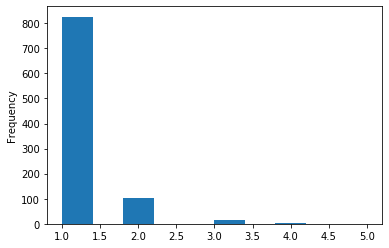

In [8]:
data_df.stop_id.plot.hist(bins=10)

In [9]:
data_df.TRIPS.sum()

3563

In [10]:
data_df.stop_id.sum()

1094

## Merging The Datasets

In [11]:
din = data_df.merge(census_df, left_on=['COUNTY','TRACT','BLOCK'], right_on=['County','Census Tract','Block'])
drop_cols = ['Area Name-Legal/Statistical Area Description', 'Qualifying Name', 'Area (Land)', 'Area (Water)',
             'Summary Level', 'Geographic Component', 'Region',
             'Division', 'FIPS', 'State (FIPS)', 'County', 'Census Tract', 'Block']
din = din.drop(drop_cols, axis=1)
din.insert(0,'TRIP_RATE', din.TRIPS/din['Total Population'])
din.TRIP_RATE.fillna(0,inplace=True)
din.head()

,TRIP_RATE,stop_id,TRIPS,RAIL_STOP,COUNTY,TRACT,BLOCK,Total Population,Total Population.1,Total Population: Male,...,Total population: Two or More Races,Households,Households: Family households,Households: Family households: Married-couple family,Households: Family households: Other family,"Households: Family households: Other family: Male householder, no wife present","Households: Family households: Other family: Female householder, no husband present",Households: Nonfamily households,Households: Nonfamily households: Householder living alone,Households: Nonfamily households: Householder not living alone
0,inf,1,2,0,63,40202,1038,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.090909,1,2,0,63,40202,1087,22,22,7,...,0,8,7,0,7,1,6,1,1,0
2,0.076923,1,2,0,63,40202,2011,26,26,18,...,0,6,4,3,1,0,1,2,2,0
3,0.001969,1,1,0,63,40203,2001,508,508,247,...,17,152,116,25,91,26,65,36,25,11
4,0.000929,1,1,0,63,40204,1001,1076,1076,476,...,29,416,257,107,150,25,125,159,123,36


In [12]:
din.shape

(945, 65)

In [13]:
din = din[din['Total Population'] > 0]
din.head()

,TRIP_RATE,stop_id,TRIPS,RAIL_STOP,COUNTY,TRACT,BLOCK,Total Population,Total Population.1,Total Population: Male,...,Total population: Two or More Races,Households,Households: Family households,Households: Family households: Married-couple family,Households: Family households: Other family,"Households: Family households: Other family: Male householder, no wife present","Households: Family households: Other family: Female householder, no husband present",Households: Nonfamily households,Households: Nonfamily households: Householder living alone,Households: Nonfamily households: Householder not living alone
1,0.090909,1,2,0,63,40202,1087,22,22,7,...,0,8,7,0,7,1,6,1,1,0
2,0.076923,1,2,0,63,40202,2011,26,26,18,...,0,6,4,3,1,0,1,2,2,0
3,0.001969,1,1,0,63,40203,2001,508,508,247,...,17,152,116,25,91,26,65,36,25,11
4,0.000929,1,1,0,63,40204,1001,1076,1076,476,...,29,416,257,107,150,25,125,159,123,36
6,0.222222,1,2,0,63,40302,1000,9,9,4,...,0,3,2,2,0,0,0,1,1,0


In [14]:
din.shape

(715, 65)

In [15]:
din.TRIP_RATE = din.TRIP_RATE.fillna(0)

In [16]:
din.TRIP_RATE = din.TRIP_RATE * 100

## Data Description
The following tables describe all of the raw data before transformation that is to be analyzed.

In [17]:
din.iloc[:,0:10].describe()


,TRIP_RATE,stop_id,TRIPS,RAIL_STOP,COUNTY,TRACT,BLOCK,Total Population,Total Population.1,Total Population: Male
count,715.000000,715.000000,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,13.590563,1.169231,2.604196,0.012587,105.92028,15053.370629,2020.167832,294.268531,294.268531,140.172028
std,162.904683,0.459148,6.154294,0.111563,18.60990,9754.287335,1015.407502,437.236080,437.236080,212.671937
min,0.033333,1.000000,1.000000,0.000000,63.00000,100.000000,1000.000000,1.000000,1.000000,0.000000
25%,0.480769,1.000000,1.000000,0.000000,89.00000,7706.000000,1013.500000,43.000000,43.000000,20.500000
50%,1.428571,1.000000,1.000000,0.000000,121.00000,10516.000000,2004.000000,106.000000,106.000000,50.000000
75%,4.000000,1.000000,2.000000,0.000000,121.00000,22402.500000,3001.000000,348.500000,348.500000,165.500000
max,4300.000000,5.000000,92.000000,1.000000,121.00000,40616.000000,6006.000000,3498.000000,3498.000000,1673.000000


In [18]:
din.iloc[:,10:20].describe()

,Total Population: Male: Under 5 years,Total Population: Male: 5 to 9 years,Total Population: Male: 10 to 14 years,Total Population: Male: 15 to 17 years,Total Population: Male: 18 to 24 years,Total Population: Male: 25 to 34 years,Total Population: Male: 35 to 44 years,Total Population: Male: 45 to 54 years,Total Population: Male: 55 to 64 years,Total Population: Male: 65 and 74 years
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,12.076923,10.008392,8.636364,5.254545,18.451748,28.686713,21.121678,16.702098,11.176224,5.205594
std,22.494219,18.272063,15.909736,9.475582,46.937874,54.610870,35.206402,24.494141,15.062419,8.858108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.500000,2.000000,0.000000
50%,3.000000,3.000000,3.000000,2.000000,5.000000,7.000000,7.000000,7.000000,5.000000,2.000000
75%,11.000000,10.000000,8.000000,5.000000,18.000000,31.000000,22.500000,20.000000,14.000000,6.000000
max,198.000000,161.000000,150.000000,85.000000,828.000000,484.000000,307.000000,213.000000,116.000000,82.000000


In [19]:
din.iloc[:,20:30].describe()

,Total Population: Male: 75 to 84 years,Total Population: Male: 85 years and over,Total Population: Female,Total Population: Female: Under 5 years,Total Population: Female: 5 to 9 years,Total Population: Female: 10 to 14 years,Total Population: Female: 15 to 17 years,Total Population: Female: 18 and 24 years,Total Population: Female: 25 to 34 years,Total Population: Female: 35 to 44 years
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,2.160839,0.690909,154.096503,11.565035,9.525874,8.366434,5.406993,19.127273,30.885315,21.648951
std,4.438579,2.431899,234.647755,21.327502,17.401032,15.262961,9.937942,37.381211,54.515161,36.598872
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,2.000000
50%,1.000000,0.000000,54.000000,3.000000,3.000000,2.000000,2.000000,5.000000,8.000000,7.000000
75%,2.000000,0.000000,171.000000,11.000000,9.000000,9.000000,6.000000,19.500000,34.000000,23.000000
max,59.000000,25.000000,2075.000000,165.000000,164.000000,155.000000,91.000000,449.000000,415.000000,362.000000


In [20]:
din.iloc[:,30:40].describe()

,Total Population: Female: 45 to 54 years,Total Population: Female: 55 to 64 years,Total Population: Female: 65 and 74 years,Total Population: Female: 75 to 84 years,Total Population: Female: 85 years and over,Total Population.2,Total Population: Under 5 years,Total Population: 5 to 9 years,Total Population: 10 to 14 years,Total Population: 15 to 17 years
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,19.121678,14.444755,7.384615,4.251748,2.367832,294.268531,23.641958,19.534266,17.002797,10.661538
std,30.648098,21.855348,13.579274,10.096917,9.434446,437.236080,43.499225,35.342936,30.868157,19.004499
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,0.000000,0.000000,43.000000,2.000000,2.000000,1.000000,1.000000
50%,7.000000,7.000000,3.000000,1.000000,0.000000,106.000000,6.000000,6.000000,5.000000,3.000000
75%,21.000000,17.000000,8.000000,4.000000,2.000000,348.500000,23.000000,19.000000,17.000000,11.000000
max,284.000000,175.000000,144.000000,153.000000,127.000000,3498.000000,360.000000,325.000000,305.000000,172.000000


In [21]:
din.iloc[:,40:50].describe()

,Total Population: 18 to 24 years,Total Population: 25 to 34 years,Total Population: 35 to 44 years,Total Population: 45 to 54 years,Total Population: 55 to 64 years,Total Population: 65 and 74 years,Total Population: 75 to 84 years,Total Population: 85 years and over,Total population,Total population: White alone
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,37.579021,59.572028,42.770629,35.823776,25.620979,12.590210,6.412587,3.058741,294.268531,57.455944
std,75.391641,105.691806,68.545395,52.959762,36.060451,21.846451,14.159619,11.535691,437.236080,138.309012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,5.000000,5.000000,6.000000,4.000000,2.000000,1.000000,0.000000,43.000000,2.000000
50%,10.000000,15.000000,13.000000,14.000000,12.000000,5.000000,2.000000,0.000000,106.000000,9.000000
75%,38.000000,68.000000,45.500000,41.500000,32.000000,14.000000,6.000000,2.000000,348.500000,34.000000
max,830.000000,720.000000,554.000000,440.000000,265.000000,217.000000,212.000000,149.000000,3498.000000,1236.000000


In [22]:
din.iloc[:,50:].describe()

,Total population: Black or African American alone,Total population: American Indian and Alaska Native alone,Total population: Asian alone,Total population: Native Hawaiian and Other Pacific Islander alone,Total population: Some Other Race alone,Total population: Two or More Races,Households,Households: Family households,Households: Family households: Married-couple family,Households: Family households: Other family,"Households: Family households: Other family: Male householder, no wife present","Households: Family households: Other family: Female householder, no husband present",Households: Nonfamily households,Households: Nonfamily households: Householder living alone,Households: Nonfamily households: Householder not living alone
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,198.699301,1.292308,11.623776,0.169231,17.797203,7.230769,124.234965,61.020979,26.103497,34.917483,7.053147,27.864336,63.213986,50.668531,12.545455
std,344.726735,5.140043,41.010653,1.652823,76.143216,16.484987,191.514919,95.144536,40.940935,62.288096,12.308817,52.415650,115.701624,94.628127,24.425020
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.500000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,9.000000,3.000000,4.000000,1.000000,2.500000,6.000000,4.000000,1.000000
50%,68.000000,0.000000,0.000000,0.000000,0.000000,1.000000,39.000000,22.000000,10.000000,12.000000,2.000000,9.000000,16.000000,13.000000,3.000000
75%,206.500000,1.000000,4.000000,0.000000,6.000000,8.000000,147.000000,67.500000,31.000000,36.500000,8.000000,29.000000,63.000000,51.000000,12.000000
max,3281.000000,90.000000,576.000000,41.000000,850.000000,258.000000,1398.000000,834.000000,341.000000,625.000000,99.000000,548.000000,1059.000000,877.000000,206.000000


In [23]:
list(din.iloc[:,54:62].columns)[1:]

['Total population: Two or More Races',
 'Households',
 'Households: Family households',
 'Households: Family households: Married-couple family',
 'Households: Family households: Other family',
 'Households: Family households: Other family: Male householder, no wife present',
 'Households: Family households: Other family: Female householder, no husband present']

In [24]:
# drop all columns without normal households
drop_cols = ['Households: Family households',
    'Households: Family households: Married-couple family',
     'Households: Family households: Other family',
     'Households: Family households: Other family: Male householder, no wife present',
     'Households: Family households: Other family: Female householder, no husband present',
     'Households: Nonfamily households',
     'Households: Nonfamily households: Householder living alone','Total Population: Female: 65 and 74 years']
din.drop(drop_cols, axis=1,inplace=True)

In [25]:
temp = din['Total Population: Under 5 years'] + din['Total Population: 5 to 9 years'] + din['Total Population: 10 to 14 years'] + din['Total Population: 15 to 17 years']
din.insert(len(din.columns),'POP_U_18', temp)
temp = din['Total Population: 18 to 24 years'] + din['Total Population: 25 to 34 years'] 
din.insert(len(din.columns),'POP_18_34', temp)
temp = din['Total Population: 35 to 44 years'] + din['Total Population: 45 to 54 years'] + din['Total Population: 55 to 64 years']
din.insert(len(din.columns),'POP_35_64', temp)
temp = din['Total Population: 65 and 74 years'] + din['Total Population: 75 to 84 years'] + din['Total Population: 85 years and over']
din.insert(len(din.columns),'POP_65_OVER', temp)
drop_cols = ['Total Population: Under 5 years','Total Population: 5 to 9 years','Total Population: 10 to 14 years',
             'Total Population: 15 to 17 years', 'Total Population: 18 to 24 years',
            'Total Population: 25 to 34 years', 'Total Population: 35 to 44 years','Total Population: 45 to 54 years',
             'Total Population: 55 to 64 years', 'Total Population: 65 and 74 years','Total Population: 75 to 84 years',
            'Total Population: 85 years and over','Total Population: Female: 65 and 74 years']



drop_cols = ['Total Population: Male: Under 5 years', 'Total Population: Male: 5 to 9 years', 'Total Population: Male: 10 to 14 years',
             'Total Population: Male: 15 to 17 years', 'Total Population: Male: 18 to 24 years',
       'Total Population: Male: 25 to 34 years', 'Total Population: Male: 35 to 44 years',
       'Total Population: Male: 45 to 54 years',
       'Total Population: Male: 55 to 64 years',
       'Total Population: Male: 65 and 74 years',
       'Total Population: Male: 75 to 84 years',
       'Total Population: Male: 85 years and over',
       'Total Population: Female: Under 5 years',
       'Total Population: Female: 5 to 9 years',
       'Total Population: Female: 10 to 14 years',
       'Total Population: Female: 15 to 17 years',
       'Total Population: Female: 18 and 24 years',
       'Total Population: Female: 25 to 34 years',
       'Total Population: Female: 35 to 44 years',
       'Total Population: Female: 45 to 54 years',
       'Total Population: Female: 55 to 64 years','Households: Nonfamily households: Householder not living alone']
din.drop(drop_cols,axis=1,inplace=True)
din.shape

(715, 39)

In [26]:
drop_cols = ['Total Population.1','Total Population: Female: 75 to 84 years',
       'Total Population: Female: 85 years and over', 'Total Population.2']
drop_cols = ['Total Population: Under 5 years', 'Total Population: 5 to 9 years',
       'Total Population: 10 to 14 years', 'Total Population: 15 to 17 years',
       'Total Population: 18 to 24 years', 'Total Population: 25 to 34 years',
       'Total Population: 35 to 44 years', 'Total Population: 45 to 54 years',
       'Total Population: 55 to 64 years', 'Total Population: 65 and 74 years',
       'Total Population: 75 to 84 years',
       'Total Population: 85 years and over']
din.drop(drop_cols,axis=1,inplace=True)

In [27]:
drop_cols = ['Total population: American Indian and Alaska Native alone',
           'Total population: Native Hawaiian and Other Pacific Islander alone',
           'Total population: Some Other Race alone',
           'Total population: Two or More Races' ]
temp = din[drop_cols].sum(axis=1)
din.drop(drop_cols,axis=1,inplace=True)
din.insert(len(din.columns),'Other', temp)

In [28]:
din.columns

Index(['TRIP_RATE', 'stop_id', 'TRIPS', 'RAIL_STOP', 'COUNTY', 'TRACT',
       'BLOCK', 'Total Population', 'Total Population.1',
       'Total Population: Male', 'Total Population: Female',
       'Total Population: Female: 75 to 84 years',
       'Total Population: Female: 85 years and over', 'Total Population.2',
       'Total population', 'Total population: White alone',
       'Total population: Black or African American alone',
       'Total population: Asian alone', 'Households', 'POP_U_18', 'POP_18_34',
       'POP_35_64', 'POP_65_OVER', 'Other'],
      dtype='object')

In [29]:
drop_cols = ['Total Population.1', 'Total Population: Female: 75 to 84 years','Total Population: Female: 85 years and over',
            'Total Population.2', 'Total population']
din.drop(drop_cols,axis=1,inplace=True)

In [30]:
def to_ratios(df,num, dem):
    df[num] = df[num]/df[dem]
    df[num] = df[num].fillna(0)
    return df

temp = din['Total Population: Male'] /din['Total Population']
din['Total Population: Male'] = temp.fillna(0)
temp = din['Total Population: Female']  /din['Total Population']
din['Total Population: Female']  = temp.fillna(0)
temp = din['Total population: White alone']  /din['Total Population']
din['Total population: White alone'] = temp.fillna(0)
temp = din['Other']  /din['Total Population']
din['Other'] = temp.fillna(0)
temp = din['Total population: Black or African American alone'] /din['Total Population']
din['Total population: Black or African American alone'] = temp.fillna(0)
temp = din['Total population: Asian alone'] /din['Total Population']
din['Total population: Asian alone'] = temp.fillna(0)


In [31]:
din = to_ratios(din,'Total Population: Male','Total Population')
din = to_ratios(din,'Total Population: Female','Total Population')
din = to_ratios(din,'Total population: White alone','Total Population')
din = to_ratios(din,'Other','Total Population')
din = to_ratios(din,'Total population: Black or African American alone','Total Population')
din = to_ratios(din,'Total population: Asian alone','Total Population')
din = to_ratios(din,'Households','Total Population')
din = to_ratios(din,'POP_U_18','Total Population')
din = to_ratios(din,'POP_18_34','Total Population')
din = to_ratios(din,'POP_35_64','Total Population')
din = to_ratios(din,'POP_65_OVER','Total Population')

In [32]:
din.head()

,TRIP_RATE,stop_id,TRIPS,RAIL_STOP,COUNTY,TRACT,BLOCK,Total Population,Total Population: Male,Total Population: Female,Total population: White alone,Total population: Black or African American alone,Total population: Asian alone,Households,POP_U_18,POP_18_34,POP_35_64,POP_65_OVER,Other
1,9.090909,1,2,0,63,40202,1087,22,0.318182,0.681818,0.000000,1.000000,0.000000,0.363636,0.363636,0.363636,0.227273,0.045455,0.000000
2,7.692308,1,2,0,63,40202,2011,26,0.692308,0.307692,0.000000,0.653846,0.000000,0.230769,0.500000,0.346154,0.153846,0.000000,0.346154
3,0.196850,1,1,0,63,40203,2001,508,0.486220,0.513780,0.092520,0.712598,0.011811,0.299213,0.370079,0.407480,0.218504,0.003937,0.183071
4,0.092937,1,1,0,63,40204,1001,1076,0.442379,0.557621,0.013941,0.935874,0.007435,0.386617,0.287175,0.315056,0.367100,0.030669,0.042751
6,22.222222,1,2,0,63,40302,1000,9,0.444444,0.555556,1.000000,0.000000,0.000000,0.333333,0.333333,0.111111,0.222222,0.333333,0.000000


## Preparing for Machine Learning
1. We remove the County, TRACT, BLOCK Columns
2. We remove duplicate columns like Total Population.1
3. We split up the data frame into X and y
4. We scale each column to -1 to 1


In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures


In [34]:
# droping un-needed columns
pipe_df = din.drop(columns=['COUNTY','TRACT','BLOCK'],axis=1)
pipe_df =pipe_df.sample(frac=1)
#Spliting into X, and y
X_df = pipe_df.drop(columns=['TRIPS','TRIP_RATE'])
y = pipe_df.TRIPS
scaler = preprocessing.StandardScaler()
nn_scaler = preprocessing.MaxAbsScaler()
X = scaler.fit_transform(X_df)
X_nn = nn_scaler = nn_scaler.fit_transform(X_df)
X1 = scaler.fit_transform(pipe_df)
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X_df)
X_poly = scaler.fit_transform(X_poly)

In [35]:
X_df.describe()

,stop_id,RAIL_STOP,Total Population,Total Population: Male,Total Population: Female,Total population: White alone,Total population: Black or African American alone,Total population: Asian alone,Households,POP_U_18,POP_18_34,POP_35_64,POP_65_OVER,Other
count,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,1.169231,0.012587,294.268531,0.476282,0.523718,0.216170,0.686905,0.029114,0.431728,0.221533,0.281930,0.388991,0.107545,0.067811
std,0.459148,0.111563,437.236080,0.111780,0.111780,0.287619,0.344047,0.067305,0.147728,0.127708,0.154569,0.137741,0.130055,0.133041
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,43.000000,0.427403,0.476954,0.011452,0.428571,0.000000,0.344828,0.139082,0.195000,0.314656,0.031094,0.000000
50%,1.000000,0.000000,106.000000,0.473684,0.526316,0.062069,0.865672,0.000000,0.400000,0.229167,0.260309,0.386364,0.068966,0.026316
75%,1.000000,0.000000,348.500000,0.523046,0.572597,0.326040,0.958904,0.022874,0.500000,0.293427,0.336865,0.459343,0.145120,0.069203
max,5.000000,1.000000,3498.000000,1.000000,1.000000,1.000000,1.000000,0.603730,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Preliminary Analysis and Feature Engineering 
1. Compute correlations of each variables with the number of trips
    - Make a graph of this
2. Compute covariance matrix
    - make a heatmap of this
3. Perform a Principle Component analysis and analyze the results
    - make a graph of the final one
    - make a bar graph for potentially the one

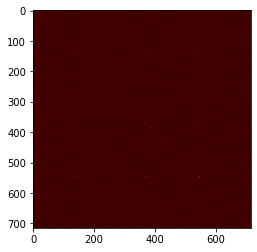

In [36]:
plt.imshow(np.cov(X1),cmap='hot')

### Covariance Analysis
We do not see any standouts in our covariance matrix

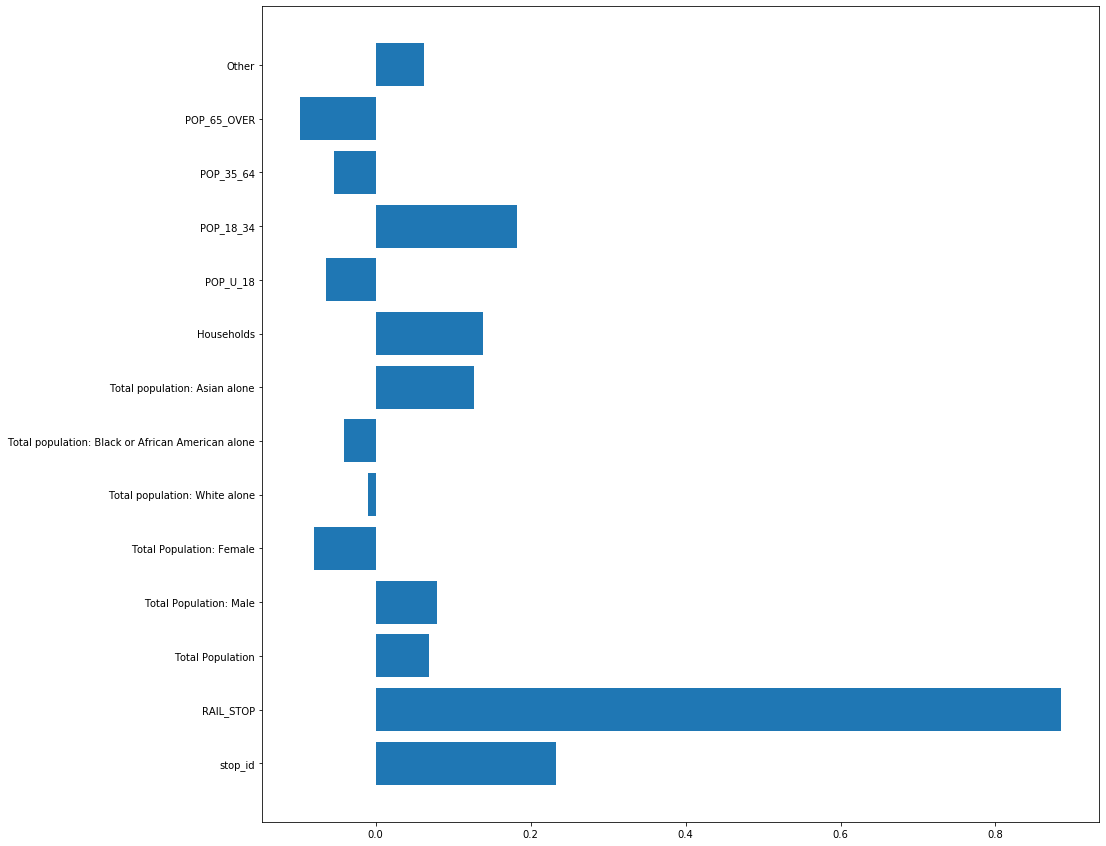

In [37]:
# getting all cor coef
corrs = []
for i in range(0,X.shape[1]):
    corrs.append(np.corrcoef(y.to_numpy(),X[:,i])[0,1])
fig, ax = plt.subplots(figsize=(15,15))

ax = plt.barh(X_df.columns,corrs)

In [38]:
pd.DataFrame(corrs, index=X_df.columns).to_csv(os.path.join(out_path,'var_corr.csv'))

### Correlation Analysis
- need to add in statistical significance 
1. Positively correlated
    - Number of stops correlated with the number of trips
    - Total population of Males 25 to 34 years is correlated
    - Total population of Asians is correlated as well
2. Negatively Correlated
    - population 65 +

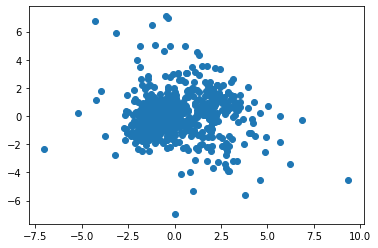

In [39]:
# implement PCA here
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
fig, ax = plt.subplots()
pc = pca.fit_transform(X)
ax = plt.scatter(pc[:,0],pc[:,1])

### Priniciple Component Analysis
- Our prinicple component analysis indicates that there are no clear clusters in the data set as is. We need furhter analysis to see if we can find any features of interest

The initial cross validation score depects a inadequate model that has to many variables that don't inform of the numbers. We believe that we should

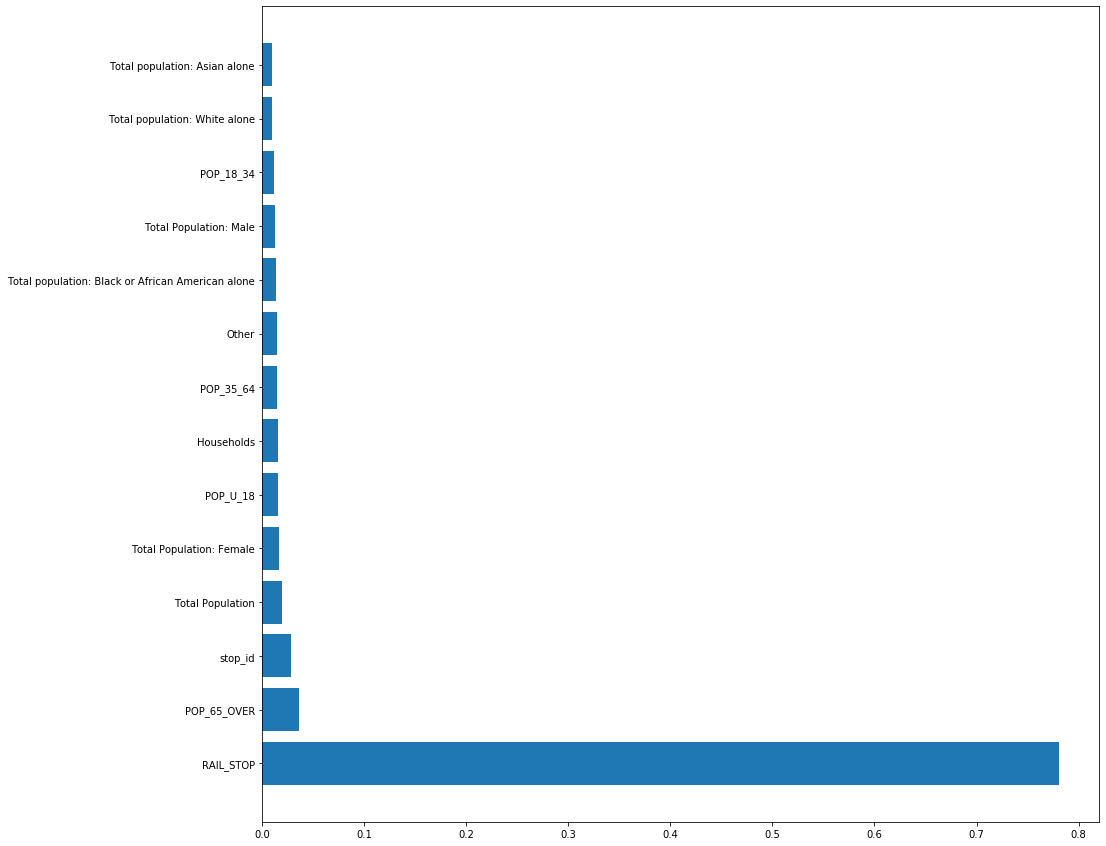

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X,y)
vif = pd.DataFrame(rf.feature_importances_,index=X_df.columns)
vif.sort_values(by=0,ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(15,15))
ax = plt.barh(vif.index,vif[0])

### Analyzing Variable Importance
1. We notice a wwide range in the variable importance factors with a lot of variables not having any influence of the task at all
2. We will drop some of these factors
3. We might need to fetch some more detailed data taht is related to income as well as
4. We can add in additional more exlanatory variables as well

We will conduct a similar analysis using a lasso regression to do some variable selection. Following this variable selection process we will construct new variables.

In [41]:
from sklearn.linear_model import Lasso

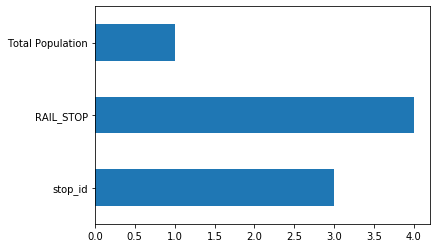

In [42]:
alphas = [0.25, 0.5, 0.75, 1]
coefs = []
for alpha in alphas:
    las_reg = Lasso(alpha=alpha)
    las_reg.fit(X,y)
    coefs.append(las_reg.coef_)
#fig, ax = plt.subplots()
coefs = pd.DataFrame(data=coefs,index=alphas,columns=X_df.columns)
coef_bool = coefs.applymap(lambda x: x != 0)
temp = coef_bool.sum()
temp[temp != 0].plot.barh()
#fig, ax = plt.subplots(figsize=(10,10))

### Lasso Variable Analysis
#### Process
We selected a series of alpha values form 0.25 to 1 by 1/4. We then saw when the coefficients were not 0 in each of the models. We then see the number of individuals.
#### Results
 - We find again that stop_id is important
 - We suggest potentially binning population into under 20, 20-35, 35-65, 65+, we can potentially remove
 - While these type of regressors are generally resistant to outliers, a complete outlier analysis would be helpful as well
 - Additional variables of interest
     - Rail Stops
     - Bus Stops
     - Adjacent Census Tract Stops
     - Income
         - median income
         - percent under 25,000 dollar a year - Car slightly affordable
         - percent under 30,000 dollars a year - Car more affordable
     - Race
         - majority white
         - majority black
         - neither
 - We will explore using the total population variable and then transitioning other variables to precentages
 - We can also change our scaling process as well
         
 

## Regression Significance Analysis
We present a analysis of each feature in a univariate regression. The statistic reported is the F value for the model test.

In [43]:
from sklearn.feature_selection import f_regression

In [44]:
f_reg = f_regression(X,y)
imp_df = pd.DataFrame(f_reg,columns=X_df.columns,index=['F Score','p_value']).T
imp_df.insert(len(imp_df.columns),'Sig_1',imp_df.p_value.apply(lambda x: x <= 0.1))
imp_df.insert(len(imp_df.columns),'Sig_05',imp_df.p_value.apply(lambda x: x <= 0.05))
imp_df[imp_df.Sig_1]

,F Score,p_value,Sig_1,Sig_05
stop_id,40.892966,2.907857e-10,True,True
RAIL_STOP,2560.354615,3.629219e-238,True,True
Total Population,3.356872,6.734204e-02,True,False
Total Population: Male,4.550878,3.324267e-02,True,True
Total Population: Female,4.550878,3.324267e-02,True,True
Total population: Asian alone,11.716842,6.547567e-04,True,True
Households,13.945028,2.032557e-04,True,True
POP_U_18,2.954796,8.605714e-02,True,False
POP_18_34,24.671874,8.515096e-07,True,True
POP_65_OVER,6.848301,9.060576e-03,True,True


### Results
We notice that the only significant factor is the number of stops at 0.05 and we have four features for 0.10. This should motivate a refactoring of features because while these granular features may have some information they likely do not contain. We found that our anlaysis pipeline improved slightly after refactoring features. We believe 
## Polynomial Features
We 

In [45]:
from sklearn.preprocessing import PolynomialFeatures

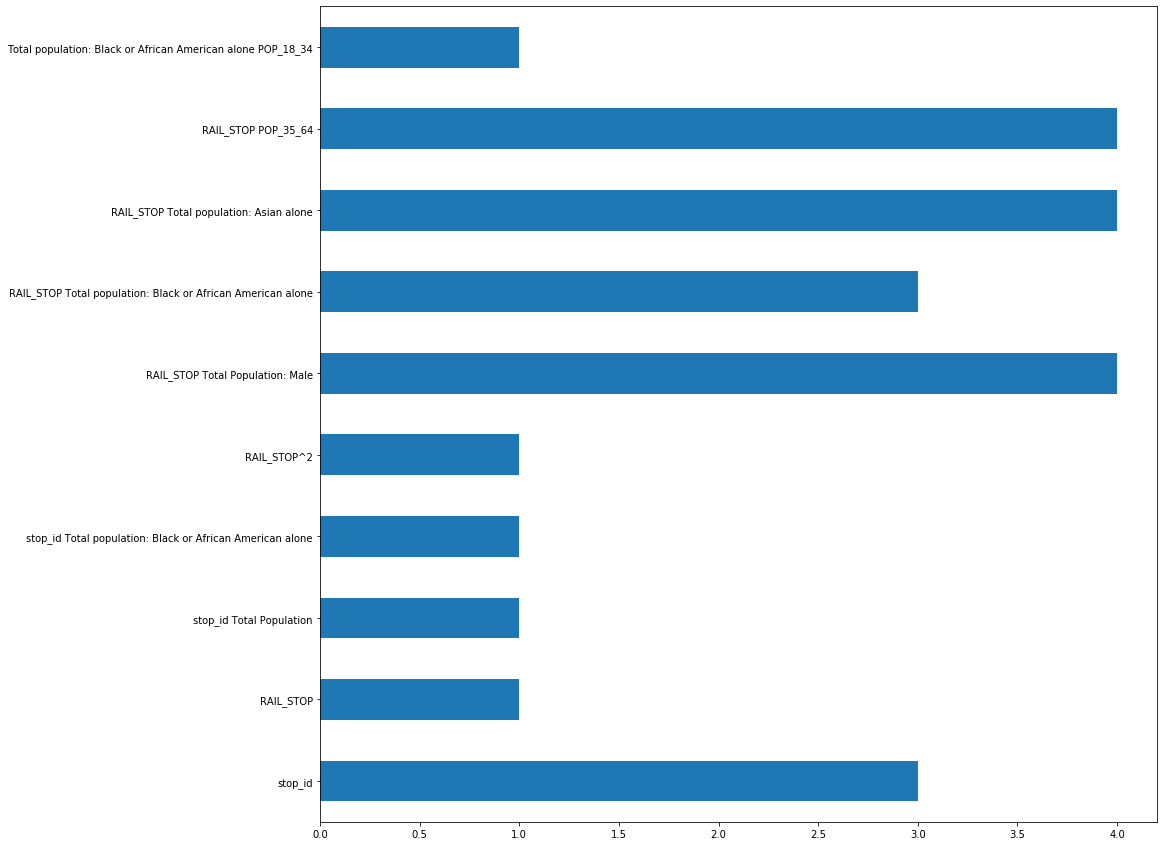

In [46]:
alphas = [0.25, 0.5, 0.75, 1]
coefs = []
for alpha in alphas:
    las_reg = Lasso(alpha=alpha, max_iter=10000)
    las_reg.fit(X_poly,y)
    coefs.append(las_reg.coef_)
#fig, ax = plt.subplots()
coefs = pd.DataFrame(data=coefs,index=alphas,columns=poly.get_feature_names(input_features=X_df.columns))
coef_bool = coefs.applymap(lambda x: x != 0)
temp = coef_bool.sum()
fig, ax = plt.subplots(figsize=(15,15))
ax = temp[temp != 0].plot.barh()

In [47]:
# add Rail Stop Black

pipe_df.insert(len(pipe_df.columns),'RAIL_STOP_BLACK',
               pipe_df['RAIL_STOP'] * pipe_df['Total population: Black or African American alone'])
# add Rail Stop Asian
pipe_df.insert(len(pipe_df.columns),
               'RAIL_STOP_ASIAN',pipe_df['RAIL_STOP'] * pipe_df['Total population: Asian alone'])
# add Rail Stop Pop 35_64

In [48]:
# droping un-needed columns
pipe_df = din.drop(columns=['COUNTY','TRACT','BLOCK'],axis=1)
pipe_df =pipe_df.sample(frac=1)
#Spliting into X, and y
X_df_2 = pipe_df.drop(columns=['TRIPS','TRIP_RATE'])


In [49]:
X_2 = scaler.fit_transform(X_df)

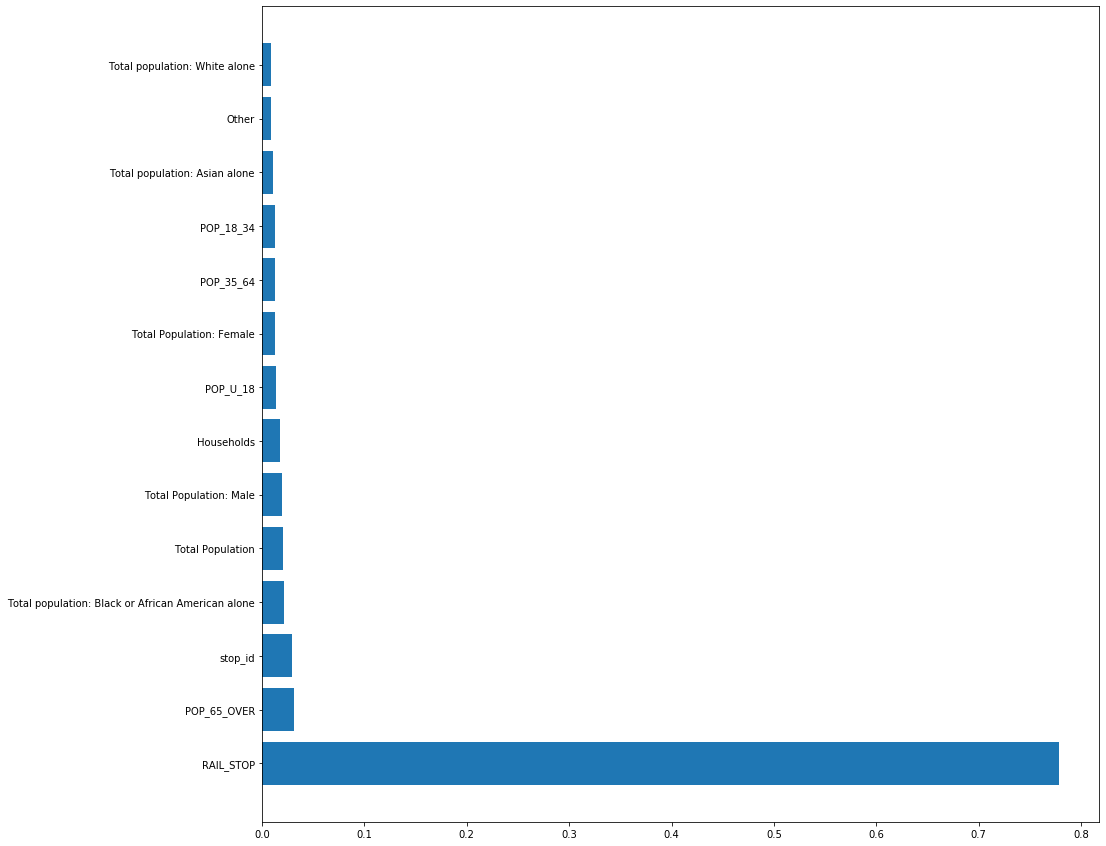

In [50]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_2,y)
vif = pd.DataFrame(rf.feature_importances_,index=X_df_2.columns)
vif.sort_values(by=0,ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(15,15))
ax = plt.barh(vif.index,vif[0])

In [51]:
X_df_2.head()

,stop_id,RAIL_STOP,Total Population,Total Population: Male,Total Population: Female,Total population: White alone,Total population: Black or African American alone,Total population: Asian alone,Households,POP_U_18,POP_18_34,POP_35_64,POP_65_OVER,Other
75,1,0,8,0.500000,0.500000,0.250000,0.750000,0.000000,0.500000,0.000000,0.125000,0.250000,0.625000,0.000000
817,3,0,1667,0.420516,0.579484,0.017397,0.950210,0.001200,0.406719,0.283143,0.222555,0.421116,0.073185,0.031194
571,1,0,82,0.402439,0.597561,0.024390,0.890244,0.000000,0.341463,0.304878,0.219512,0.365854,0.109756,0.085366
752,1,0,167,0.526946,0.473054,0.850299,0.119760,0.005988,0.610778,0.113772,0.311377,0.508982,0.065868,0.023952
686,2,0,223,0.524664,0.475336,0.017937,0.959641,0.000000,0.349776,0.264574,0.174888,0.448430,0.112108,0.022422


In [52]:
#temp = (X_df['Total population: Black or African American alone'] > 0.50)* 1 
#X_df.insert(3,'MAJ_BLACK',temp)
#temp = (X_df['Total population: White alone'] > 0.50)* 1 
#X_df.insert(4,'MAJ_WHITE',temp)

In [53]:
#y = pipe_df.TRIPS
#scaler = preprocessing.StandardScaler()
#X = scaler.fit_transform(X_df.iloc[:,4:])
#X = np.hstack((X_df.iloc[:,:4],X))

- Add Rail Stop and Asian
- Add Rail stop and Black alone

In [54]:
from sklearn.model_selection import GridSearchCV

## Model Analysis and Calibrartion


In [55]:
cv_scores = []

### Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor(n_estimators=100)
temp = cross_val_score(rf,X,y,cv=10,scoring='neg_mean_squared_error')
print(sum(temp * -1)/10)
cv_scores.append(("RF",sum(temp * -1)/10))

11.095865541862285


In [57]:
print(temp)

[ -1.93703056 -21.2614625  -16.89959444  -2.20970694 -35.22687083
  -4.95389718  -3.18185775 -18.66892254  -2.1730338   -4.44627887]


### Neural Network

- our results from the ranndom forest classifier suggests there are significant non linear factors to be considered.


In [58]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV


In [59]:
nn = MLPRegressor(solver='lbfgs')
param_grid = {'hidden_layer_sizes':[(8,),(8,4),(8,4,2)],
              'alpha':10.0 ** -np.arange(1, 7)}
opt = GridSearchCV(nn,param_grid,cv=10,iid=True,scoring='neg_mean_squared_error')
opt.fit(X_nn,y)
print(opt.best_estimator_)
nn = opt.best_estimator_
temp = cross_val_score(nn,X_nn,y,cv=10,scoring='neg_mean_squared_error')
sum(temp * -1)/10
cv_scores.append(("Neural Network",sum(temp * -1)/10))

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(8, 4, 2), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)


In [60]:
cv_scores

[('RF', 11.095865541862285), ('Neural Network', 30.445530305141762)]

### Regression Techniques
#### Lasso

In [61]:
param_grid = {'alpha':[0.01,0.1,0.25,0.5,0.75,1]}
lass = Lasso()
opt = GridSearchCV(lass,param_grid,cv=10)
opt.fit(X,y)
lass = opt.best_estimator_
temp = cross_val_score(lass,X,y,cv=10,scoring='neg_mean_squared_error')
print(temp)
cv_scores.append(("Lasso",sum(temp * -1)/10))

[ -1.16910817 -18.582115    -7.37275392  -2.01273275 -35.83260593
  -7.12902347  -3.9006886   -8.46360626  -2.8432135   -4.62514268]


/Users/joshuamorgan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [94]:
lass

Lasso(alpha=0.25, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [62]:
print(sum(temp*-1)/10)

9.1930990288364


#### Ridge

In [63]:
from sklearn.linear_model import Ridge

In [64]:
param_grid = {'alpha':[0.01,0.1,0.25,0.5,0.75,1]}
ridge = Ridge()
opt = GridSearchCV(ridge,param_grid,cv=10)
opt.fit(X,y)
ridge = opt.best_estimator_
temp = cross_val_score(ridge, X,y,cv=10,scoring='neg_mean_squared_error')
print(sum(temp*-1)/10)
print(ridge)
cv_scores.append(("Ridge",sum(temp * -1)/10))

/Users/joshuamorgan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


9.36571233181553
Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)


#### Elastic Net

In [65]:
from sklearn.linear_model import ElasticNet

In [66]:
elast = ElasticNet()
param_grid = {"l1_ratio":[0.1,0.25,0.5,0.75],'alpha':[0.01,0.1,0.25,0.5,0.75,1]}
opt = GridSearchCV(elast,param_grid,cv=10)
opt.fit(X,y)
elast = opt.best_estimator_
temp = cross_val_score(ridge, X,y,cv=10,scoring='neg_mean_squared_error')
print(sum(temp*-1)/10)
print(elast)
cv_scores.append(("ELAST",sum(temp * -1)/10))

9.36571233181553
ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


/Users/joshuamorgan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Support Vector Machines

In [67]:
from sklearn import svm

In [68]:
param_grid = {'kernel': ['poly','rbf'],
              "C":[0.1,0.25,0.5,0.75,1,1.5] 
             }
svr = svm.SVR(gamma='auto')
opt = GridSearchCV(svr,param_grid,cv=10)
opt.fit(X,y)
svr = opt.best_estimator_
temp = cross_val_score(svr,X,y,cv=10,scoring='neg_mean_squared_error')
print(sum(temp * -1)/10)
cv_scores.append(("SVR",sum(temp * -1)/10))

/Users/joshuamorgan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


10.954345976907181


In [69]:
print(svr)
temp

SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


array([ -1.55052935,  -5.95464685, -11.52118006,  -2.91759564,
       -40.52383555,  -7.36651072, -13.34942905, -16.69235591,
        -3.90236797,  -5.76500868])

## KNR

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [77]:
cv_scores

[('RF', 11.095865541862285),
 ('Neural Network', 30.445530305141762),
 ('Lasso', 9.1930990288364),
 ('Ridge', 9.36571233181553),
 ('ELAST', 9.36571233181553),
 ('SVR', 10.954345976907181),
 ('KNR', 9.413994950606416)]

In [71]:
knr = KNeighborsRegressor()
param_grid = {'weights':["uniform",'distance'],
             'algorithm':['ball_tree','kd_tree'],
             "n_neighbors":[2,4,6,8,10,12]}
opt = GridSearchCV(knr,param_grid,cv=10)
opt.fit(X,y)
knr = opt.best_estimator_
temp = cross_val_score(knr,X,y,cv=10,scoring='neg_mean_squared_error')
print(sum(temp * -1)/10)
cv_scores.append(("KNR",sum(temp * -1)/10))

9.413994950606416


/Users/joshuamorgan/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [72]:
temp

array([ -1.7109375 ,  -4.99934896,  -4.64973958,  -2.15386285,
       -42.31532118,  -9.73965669,  -4.18573944, -17.14854754,
        -2.82020246,  -4.41659331])

In [73]:
knr

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')

# Results

In [74]:
results = pd.DataFrame(cv_scores)
results = results.rename(columns={0:'MODEL',1:'RMSE'})
results.to_csv(os.path.join(out_path,'results.csv'))

In [75]:
lass.fit(X,y)
coefs = pd.DataFrame(lass.coef_,index=X_df.columns)
coefs = coefs.rename({0:'Coefficient'},axis=1)
coefs.to_csv(os.path.join(out_path,'Coefficients.csv'))

In [78]:
results

,MODEL,RMSE
0,RF,11.095866
1,Neural Network,30.445530
2,Lasso,9.193099
3,Ridge,9.365712
4,ELAST,9.365712
5,SVR,10.954346
6,KNR,9.413995


In [74]:
lass.predict(X).sum()

1862.0000000000002

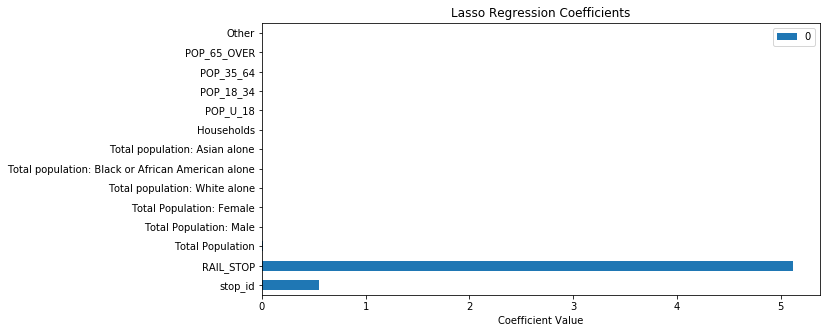

In [93]:

lass_coefs_df = pd.DataFrame(lass.coef_,index = X_df.columns)
fig, ax = plt.subplots(figsize=(10,5))
lass_coefs_df.plot.barh(ax=ax)
ax.set_xlabel('Coefficient Value')
ax.set_title('Lasso Regression Coefficients')
fig.savefig(os.path.join(out_path,'Lasso_Coeffs.png'))

In [79]:
X_2 = X.copy()
X_2[:,1] = 1

In [80]:
lass.predict(X_2).sum() - lass.predict(X).sum()

3759.8875585718006

array([[-0.36883388,  8.85688684, -0.40342491, ..., -0.36331109,
        -0.04501458, -0.51005379],
       [-0.36883388,  8.85688684,  0.56698178, ..., -0.61435549,
        -0.68553681,  3.6671472 ],
       [-0.36883388,  8.85688684, -0.24092756, ..., -0.36591716,
        -0.37967579,  0.28589725],
       ...,
       [-0.36883388,  8.85688684,  0.25800795, ..., -0.68401113,
        -0.56282691, -0.06651154],
       [-0.36883388,  8.85688684, -0.33018667, ...,  1.4361267 ,
        -0.46842656, -0.15903938],
       [-0.36883388,  8.85688684, -0.50412749, ...,  0.11925169,
         1.14810065, -0.40840869]])

In [77]:
X_df.RAIL_STOP = 0
X_2 = scaler.fit_transform(X_df)

In [78]:
y.describe()

count    715.000000
mean       2.604196
std        6.154294
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       92.000000
Name: TRIPS, dtype: float64

In [79]:
y.sum()

1862

In [80]:
lass.predict(X_2).sum() 

1861.9999999999998

In [102]:
X_df.T

,693,330,438,828,108,165,365,700,523,384,...,546,214,333,558,298,901,173,815,703,909
stop_id,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RAIL_STOP,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Total Population,27.000000,243.000000,101.000000,117.000000,1593.000000,542.000000,65.000000,73.000000,77.000000,217.000000,...,61.000000,461.000000,1102.000000,56.000000,320.000000,116.000000,1302.000000,149.000000,85.000000,171.000000
Total Population: Male,0.555556,0.374486,0.386139,0.470085,0.598870,0.452030,0.507692,0.369863,0.649351,0.525346,...,0.491803,0.414317,0.433757,0.428571,0.443750,0.422414,0.453917,0.409396,0.494118,0.461988
Total Population: Female,0.444444,0.625514,0.613861,0.529915,0.401130,0.547970,0.492308,0.630137,0.350649,0.474654,...,0.508197,0.585683,0.566243,0.571429,0.556250,0.577586,0.546083,0.590604,0.505882,0.538012
Total population: White alone,0.037037,0.000000,0.049505,0.051282,0.290647,0.018450,0.030769,0.027397,0.077922,0.442396,...,0.016393,0.401302,0.011797,0.000000,0.018750,0.060345,0.129032,0.013423,0.023529,0.883041
Total population: Black or African American alone,0.962963,0.971193,0.950495,0.871795,0.051475,0.942804,0.953846,0.958904,0.896104,0.516129,...,0.983607,0.186551,0.941924,1.000000,0.953125,0.836207,0.822581,0.946309,0.976471,0.046784
Total population: Asian alone,0.000000,0.000000,0.000000,0.000000,0.012555,0.001845,0.000000,0.000000,0.000000,0.013825,...,0.000000,0.390456,0.007260,0.000000,0.000000,0.000000,0.018433,0.000000,0.000000,0.023392
Households,0.481481,0.370370,0.386139,0.393162,0.249843,0.446494,0.461538,0.438356,0.350649,0.442396,...,0.360656,0.533623,0.317604,0.375000,0.403125,0.508621,0.494624,0.369128,0.341176,0.543860
POP_U_18,0.222222,0.481481,0.277228,0.205128,0.311362,0.271218,0.138462,0.232877,0.181818,0.152074,...,0.245902,0.095445,0.268603,0.232143,0.296875,0.250000,0.215822,0.234899,0.164706,0.128655
